# (Bike Sharing Analysis with Ford GoBike Data- 2017 version)
## by (Osama Ismael)

## Investigation Overview

> The project is about investigate the data of bicycle-sharing systems, its really important application in which users
order a bike to ride it for thier destination , it help reduce pollution that comes from cars and buses ,  make its users healthy and its really more fun

## Dataset Overview

> the dataset contains number of bikes id with some infromation about the start ,end destination of the trip and the duration 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Here we can see that the Subscribers rent more than regular Customer 
may be because Subscribers gets more offers or sales

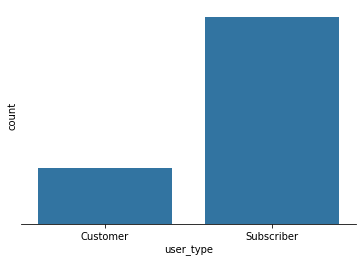

In [16]:
default_color = sb.color_palette()[0]
g = sb.countplot(data = df, x = 'user_type' , color =default_color)
g.set(yticks=[])
g.set(yticklabels=[])
sb.despine(top=True, right=True, left=True, bottom=False)

## (Visualization 2)

>people like to rent in september , october , november as they are 
End of year vacation ,so they dont need to reach there destination faster.

Text(0.5, 0, 'Month')

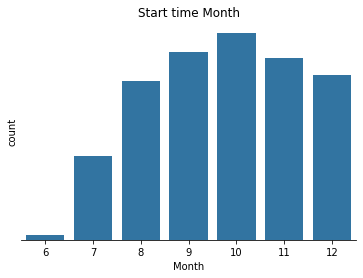

In [20]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_time_month'] = df['start_time'].dt.month.astype(int)
default_color = sb.color_palette()[0]
g = sb.countplot(data = df,x = 'start_time_month', color = default_color)
g.set(yticks=[])
g.set(yticklabels=[])
sb.despine(top=True, right=True, left=True, bottom=False)
plt.title('Start time Month')
plt.xlabel("Month")

## (Visualization 3)
> its look like users are more likely to rent if the end destination isnt so far from the start one

Text(0.5, 0, 'Duration (min)')

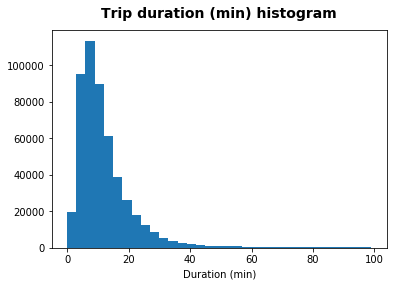

In [21]:
df['duration_min'] = df['duration_sec'] / 60
plt.hist(data = df, x = 'duration_min', bins = np.arange(0, 100,3));
plt.title("Trip duration (min) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Duration (min)')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

## (Visualization 4)
> Users dont rent alot of bike in saturday and sunday

In [24]:
df['day_of_week'] = df['start_time'].dt.day_name()

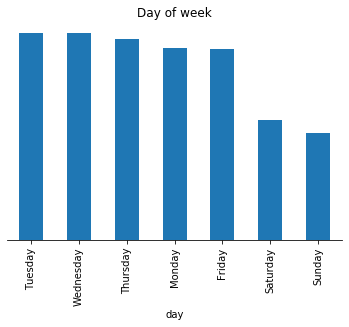

In [27]:
g = df['day_of_week'].value_counts().plot(kind='bar')
plt.title('Day of week')
plt.xlabel ('day')
g.set(yticks=[])
g.set(yticklabels=[])
sb.despine(top=True, right=True, left=True, bottom=False)

## (Visualization 5)
> users likes to rent in hot weather more the cold weather

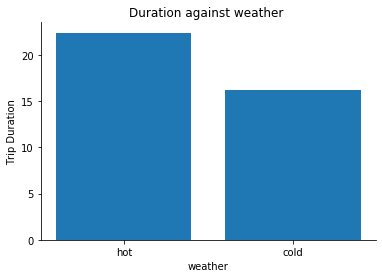

In [32]:
#We categorize our months for two categories; hot and cold
hot = df.query('start_time_month in ["6" , "7" , "8"]' ).duration_min.mean ()
cold = df.query('start_time_month in ["10" , "11" , "12"] ').duration_min.mean()

plt.bar(['hot','cold'],[hot , cold] )
plt.title('Duration against weather ')
plt.xlabel('weather')
plt.ylabel('Trip Duration')
sb.despine(top=True, right=True, left=False, bottom=False)